# ABSTRACT


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

The datasets consists of several medical predictor variables and one target variable, diabetes. Predictor variables includes the number of pregnancies the patient has had, their BMI, weight, age,glucose, and so on.

VARIABLE INFORMATION


***Patient data***


patient_number : Unique ID for each patient (1 to 390)

cholesterol : Cholesterol level in mg/dl (115 to 443)

glucose : Blood glucose level in mg/dl (48 to 385)

hdl_chol : HDL cholesterol level in mg/dl (12 to 120)

chol_hdl_ratio : Ratio of total cholesterol to HDL (1.9 to 19.3)

age : Age of the patient in years (19 to 92)

gender : Gender of the patient (male or female)

height : Height of the patient in cm (52 to 76)

weight : Weight of the patient in kg (102 to 320)

bmi : Body mass index of the patient (15.2 to 55.8)


***Blood pressure***


systolic_bp : Systolic blood pressure in mmHg (90 to 250)

diastolic_bp : Diastolic blood pressure  in mmHg (48 to 124)


***Body measurements***


waist : Waist circumference in cm (26 to 56)

hip : Hip circumference in cm (30 to 64)

waist_hip_ratio : Ratio of waist to hip circumference (0.68 to 1.14)


***Outcome***


diabetes : Indicates if the patient has diabetes (Yes/No)

#Data Cleaning

In [72]:
# importing neccessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline

In [73]:
# reading the dataset
# URL to the raw CSV file in the GitHub repository
url = 'https://raw.githubusercontent.com/ronakmishra619/Data_Science_Assignment/main/diabetes.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(url,decimal=",")

# Now, 'df' contains the data from the "diabetes.csv" file.

# df = pd.read_csv(url)
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


**OBSERVATION**

The dataset named 'diabetes.csv' is read into a Pandas DataFrame ('df') using the URL of the raw CSV file from a GitHub repository. The decimal="," parameter is specified to correctly handle decimal separators in the dataset.

In [74]:
# checking the shape of the dataframe
df.shape

(390, 16)

**OBSERVATION**

Next, we will examine the column data types to determine whether they are numerical or categorical.

#What are the data types? (Only numeric and categorical

In [75]:
# printing all the datatypes of respective columns
df.dtypes

patient_number       int64
cholesterol          int64
glucose              int64
hdl_chol             int64
chol_hdl_ratio     float64
age                  int64
gender              object
height               int64
weight               int64
bmi                float64
systolic_bp          int64
diastolic_bp         int64
waist                int64
hip                  int64
waist_hip_ratio    float64
diabetes            object
dtype: object

**OBSERVATION**

The provided table is a DataFrame with 390 entries and 16 columns.The columns have various data types such as int64 (11 columns) and float64(3 columns) and object(2 columns) .

#  Are there missing values?

In [76]:
## Checking for missing values

df.isnull().sum()

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

**OBSERVATION**

From the above results,there are no missing values in any of the columns. Each count is zero, suggesting that the dataset is complete, and there are no null values in any of the columns.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_number   390 non-null    int64  
 1   cholesterol      390 non-null    int64  
 2   glucose          390 non-null    int64  
 3   hdl_chol         390 non-null    int64  
 4   chol_hdl_ratio   390 non-null    float64
 5   age              390 non-null    int64  
 6   gender           390 non-null    object 
 7   height           390 non-null    int64  
 8   weight           390 non-null    int64  
 9   bmi              390 non-null    float64
 10  systolic_bp      390 non-null    int64  
 11  diastolic_bp     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  waist_hip_ratio  390 non-null    float64
 15  diabetes         390 non-null    object 
dtypes: float64(3), int64(11), object(2)
memory usage: 48.9+ KB


In [78]:
df.columns

Index(['patient_number', 'cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'gender', 'height', 'weight', 'bmi',
       'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio',
       'diabetes'],
      dtype='object')

In [79]:
df.describe()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,4.524615,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385
std,112.727548,44.666005,53.798188,17.279069,1.736634,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212
min,1.000000,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000
25%,98.250000,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000
50%,195.500000,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000
75%,292.750000,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000
max,390.000000,443.000000,385.000000,120.000000,19.300000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000


Now, let's determine the probable distributions of the numeric variables.

# What are the likely distributions of the numeric variables?

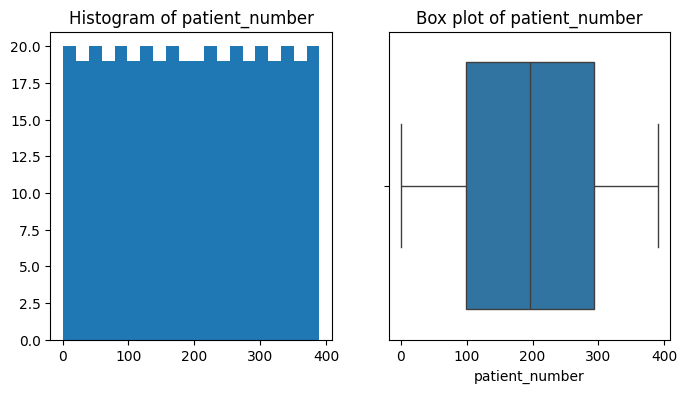

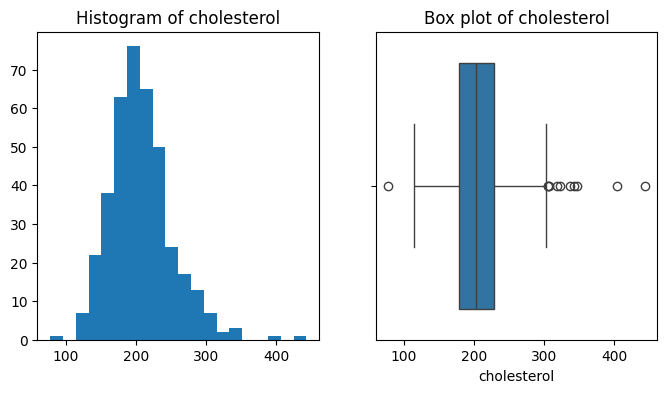

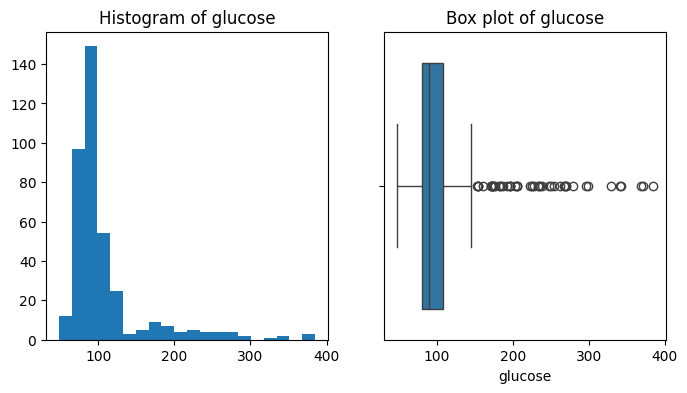

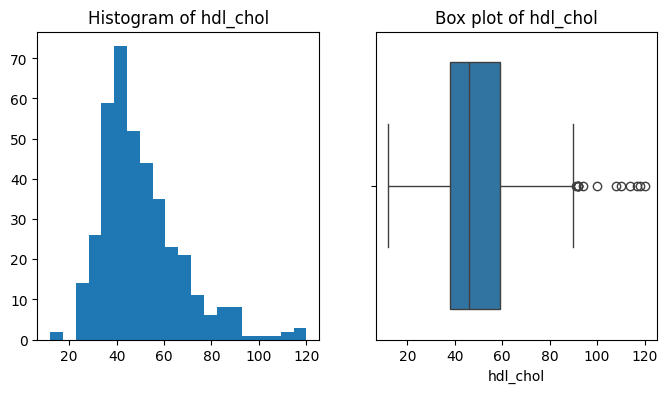

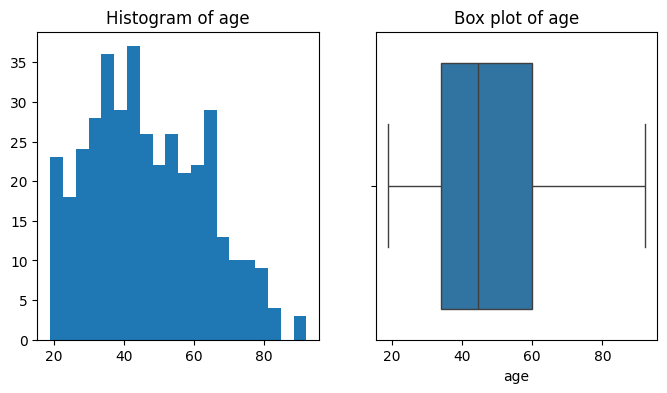

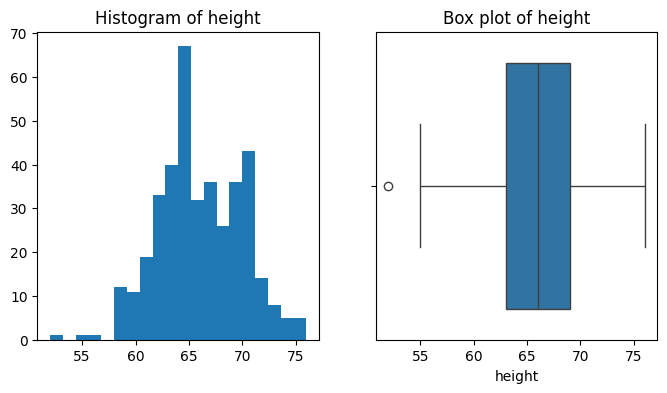

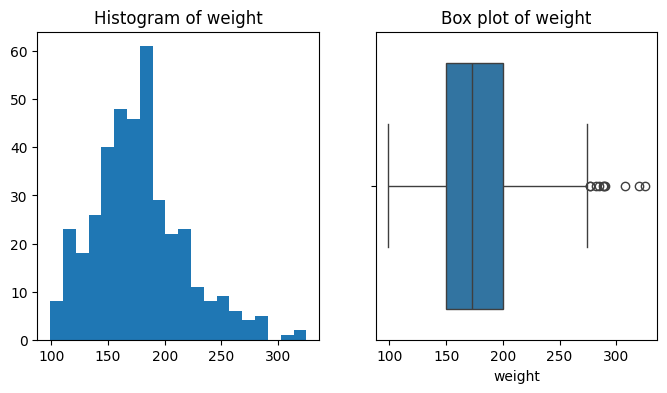

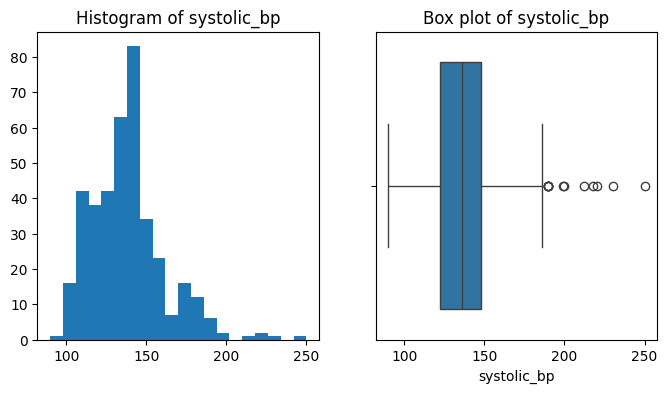

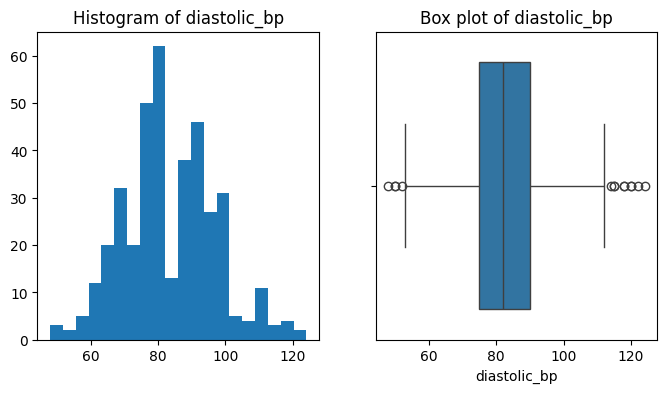

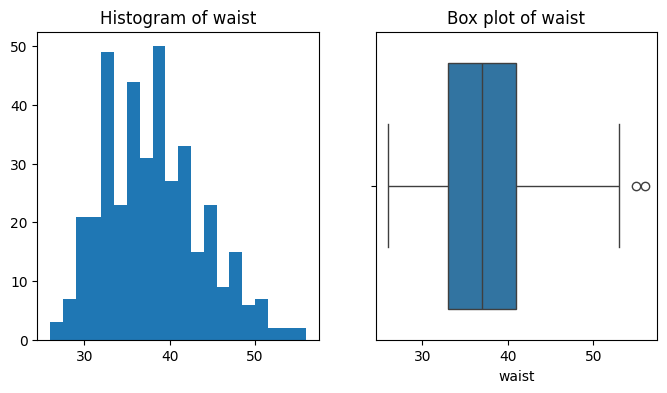

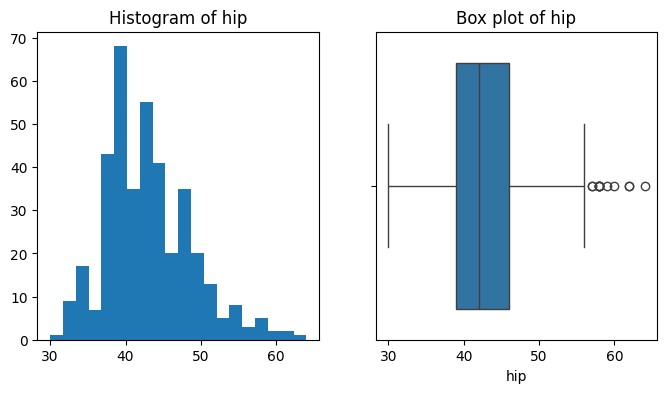

       patient_number  cholesterol     glucose    hdl_chol         age  \
count      390.000000   390.000000  390.000000  390.000000  390.000000   
mean       195.500000   207.230769  107.338462   50.266667   46.774359   
std        112.727548    44.666005   53.798188   17.279069   16.435911   
min          1.000000    78.000000   48.000000   12.000000   19.000000   
25%         98.250000   179.000000   81.000000   38.000000   34.000000   
50%        195.500000   203.000000   90.000000   46.000000   44.500000   
75%        292.750000   229.000000  107.750000   59.000000   60.000000   
max        390.000000   443.000000  385.000000  120.000000   92.000000   

           height      weight  systolic_bp  diastolic_bp       waist  \
count  390.000000  390.000000   390.000000    390.000000  390.000000   
mean    65.951282  177.407692   137.133333     83.289744   37.869231   
std      3.918867   40.407824    22.859528     13.498192    5.760947   
min     52.000000   99.000000    90.000000   

<ipython-input-80-aa646c3e84ed>:32: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.skew())
<ipython-input-80-aa646c3e84ed>:33: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.kurt())


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/ronakmishra619/Data_Science_Assignment/main/diabetes.csv')  # Replace with your actual file path

# Select numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Loop through each numeric column and visualize its distribution
for col in numeric_cols:
    plt.figure(figsize=(8, 4))

    # Histogram for basic distribution shape
    plt.subplot(1, 2, 1)
    plt.hist(data[col], bins=20)
    plt.title(f"Histogram of {col}")

    # Box plot for outliers and distribution spread
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x=col)
    plt.title(f"Box plot of {col}")

    plt.show()

# Additional insights:
# - Describe numerical variables with summary statistics
print(data.describe())

# - Check for skewness and kurtosis
print(data.skew())
print(data.kurt())


**OBSERVATION**

Analyzed the distributions of numeric variables in a dataset. It visualizes each numeric variable’s distribution using a histogram and a box plot. It also prints summary statistics, skewness, and kurtosis for each numeric variable. This helps in understanding the central tendency, dispersion, and shape of the dataset’s distributions.

Analyzing categorical features

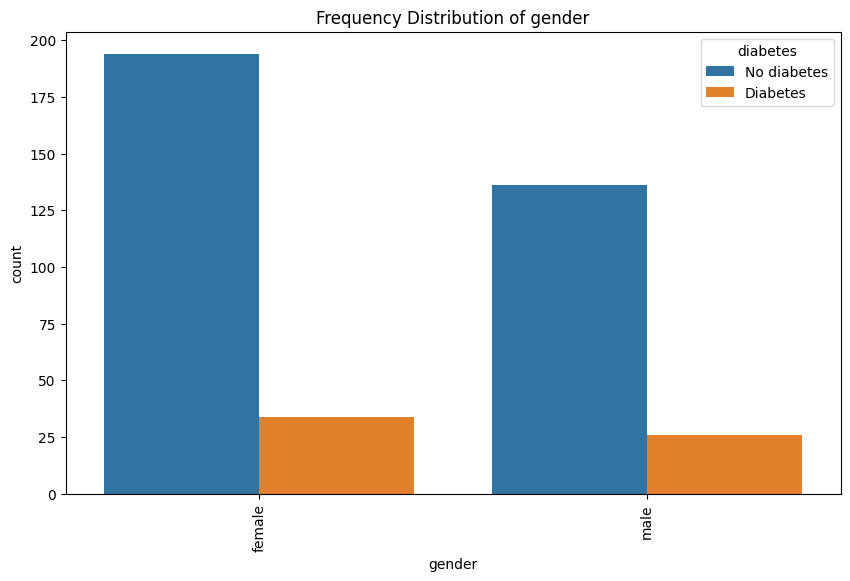

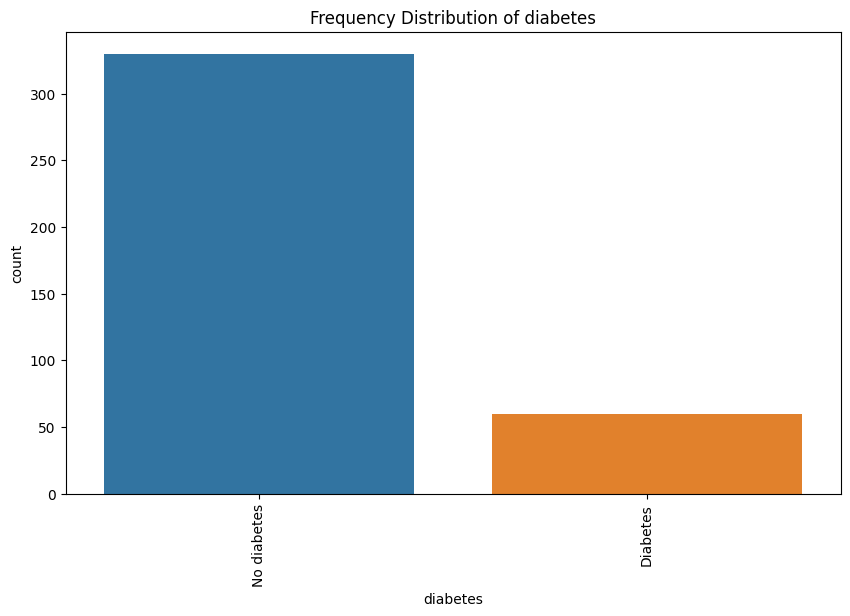

In [81]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# plotting frequency distribution for categorical variables

for col in categorical_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df,x=col,hue='diabetes')
  plt.title(f'Frequency Distribution of {col}')
  plt.xticks(rotation=90)
  plt.show()
  print("\n")

Now, we'll ascertain the pertinent independent variables for predicting a target (dependent variable)

#Which independent variables are useful to predict a target (dependent variable)?

Feature selection

In [82]:
data['diabetes'].value_counts()

No diabetes    330
Diabetes        60
Name: diabetes, dtype: int64

Exploring Feature Correlation in the Dataset through a Heatmap Analysis

<ipython-input-83-17edaee30db3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, ax=ax, cmap='BrBG').set(


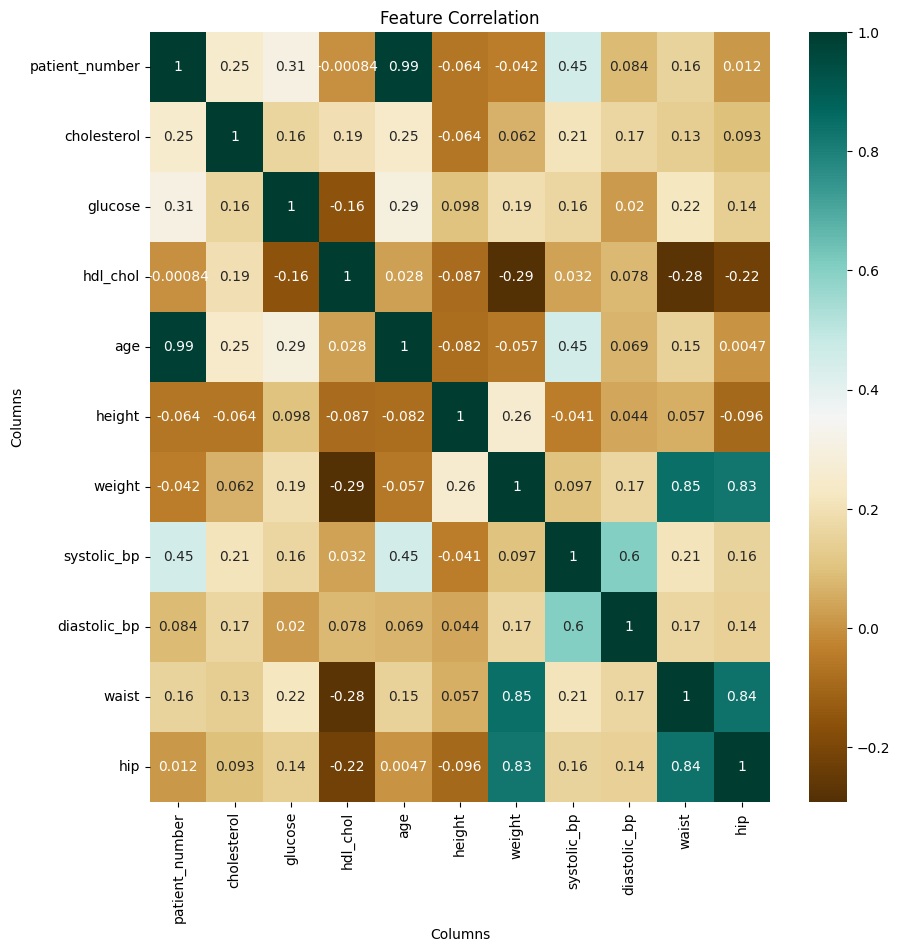

In [83]:
data
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

1-waist and weight
2-hip and weight
3-waist and bmi
4-hip and bmi
5-hip and waist have highest correlation

Now, Exploring Feature Relationships and Diabetes Status with Pair Plot Analysis

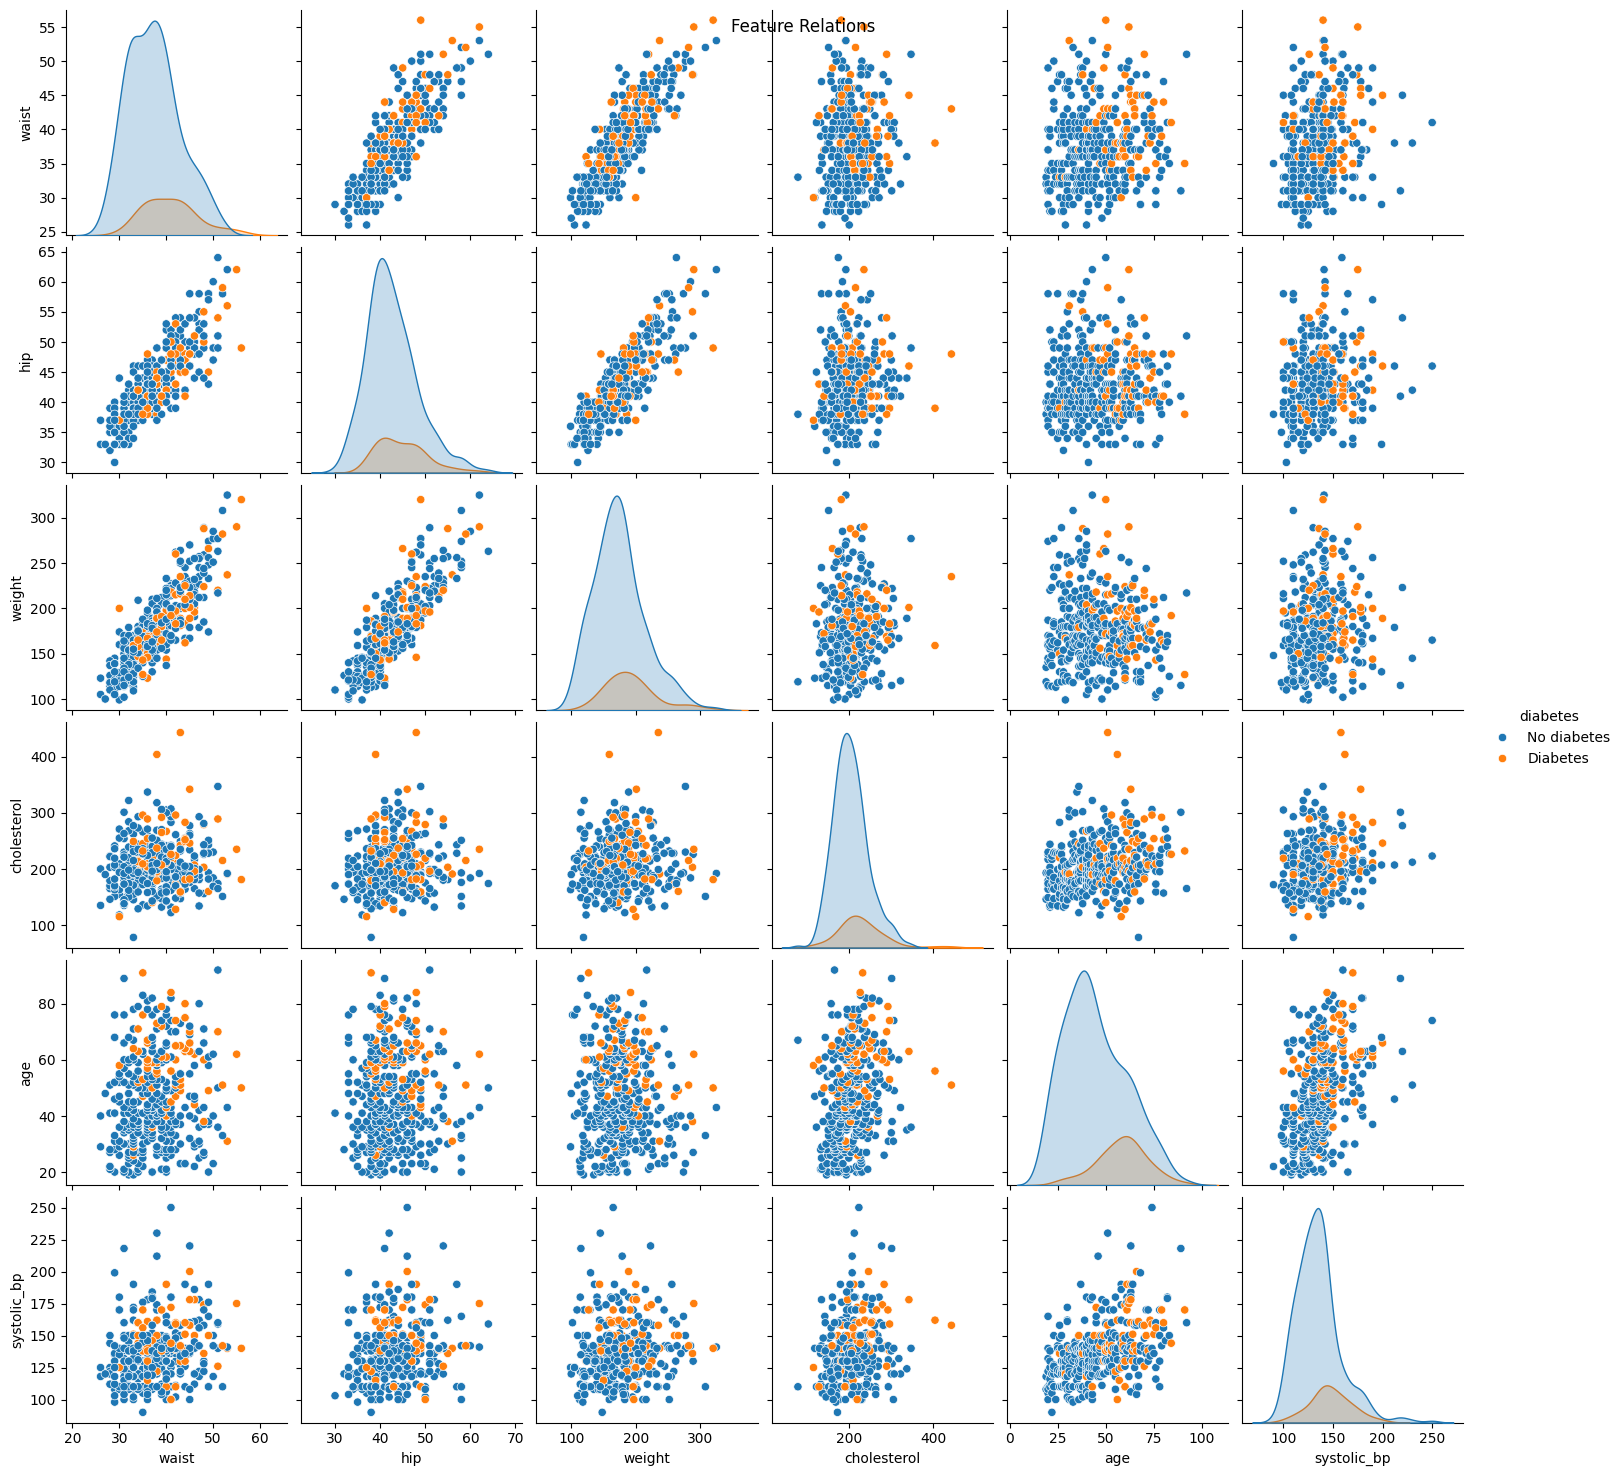

In [84]:
figures = sns.pairplot(data[['waist','hip','weight','bmi','chol_hdl_ratio','cholesterol','age','systolic_bp','diabetes']], hue='diabetes')
figures.fig.suptitle('Feature Relations')
plt.show()

Analyzing the Relationship Between Hip and Waist Measurements with a Regression Joint Plot

<Figure size 1200x1200 with 0 Axes>

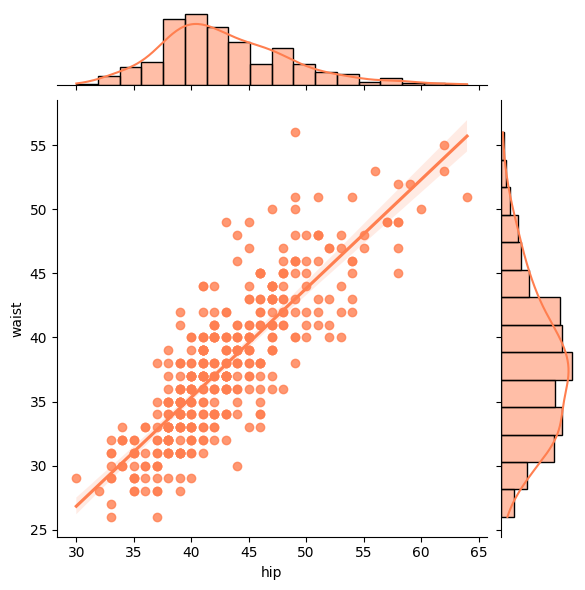

In [85]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'hip', y= 'waist', kind= 'reg',color='coral')
plt.show()

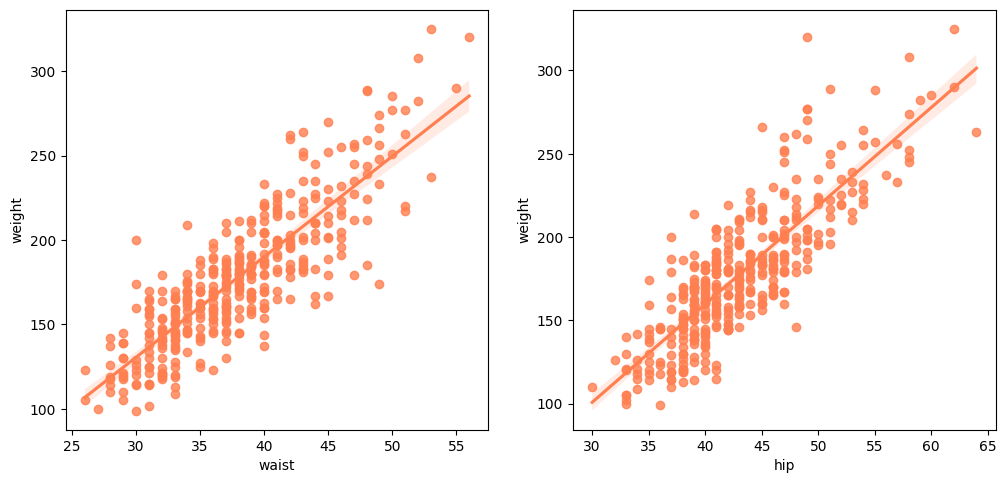

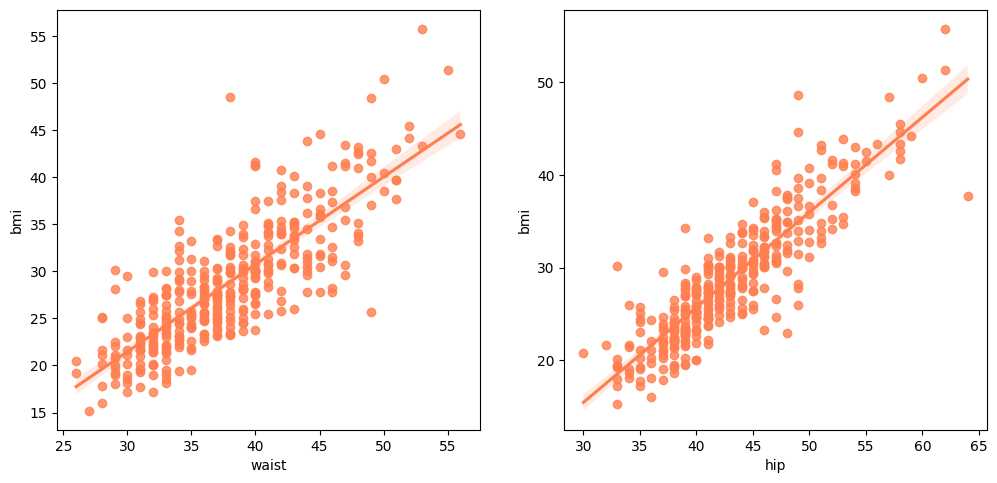

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Waist and Weight
fig1 = plt.figure(figsize=(12, 12))
ax1 = fig1.add_subplot(221)
sns.regplot(data=df, x='waist', y='weight', color='coral', ax=ax1)

# 2 - Hip and Weight
ax2 = fig1.add_subplot(222)
sns.regplot(data=df, x='hip', y='weight', color='coral', ax=ax2)

# 3 - Waist and BMI
fig2 = plt.figure(figsize=(12, 12))
ax3 = fig2.add_subplot(221)
sns.regplot(data=df, x='waist', y='bmi', color='coral', ax=ax3)

# 4 - Hip and BMI
ax4 = fig2.add_subplot(222)
sns.regplot(data=df, x='hip', y='bmi', color='coral', ax=ax4)

plt.show()


**OBSERVATION**

I've analyzed the relationships between different pairs of variables in a dataset using regression plots.

In the first part, I’m creating a joint plot to analyze the relationship between ‘hip’ and ‘waist’ measurements. This plot includes a scatter plot of these two variables along with their individual histograms on the top and right axes.

In the second part, I’m creating four separate regression plots to analyze the relationships between ‘waist’ and ‘weight’, ‘hip’ and ‘weight’, ‘waist’ and ‘bmi’, and ‘hip’ and ‘bmi’. Each plot shows a scatter plot of the two variables along with a regression line that indicates the trend in the data.

These visualizations can help in understanding the correlations between these variables and how they might be related to each other. For example, if there is a positive trend in the regression line, it indicates that as one variable increases, the other variable also tends to increase. Conversely, a negative trend indicates that as one variable increases, the other tends to decrease. The strength and direction of these relationships can provide valuable insights for further analysis or modeling.





#Which independent variables have missing data? How much?

Now we will,
Determine the independent variables with missing data and quantify the extent of the missing values.

<ipython-input-87-0e4ba90ba7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage, y=missing_percentage.index, palette='viridis')


Text(0, 0.5, 'Columns')

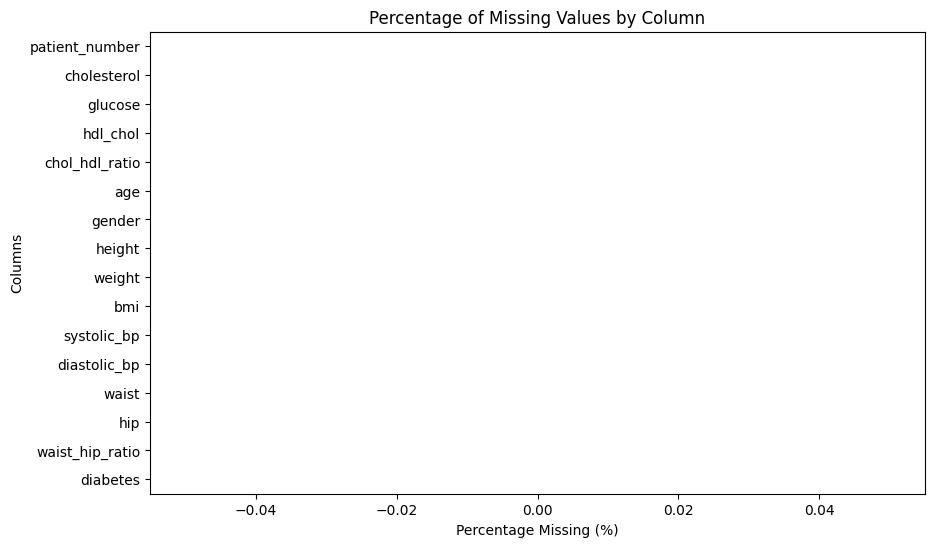

In [87]:
# plotting the missing values according to percentages for better visualization
missing_percentage = (df.isnull().mean() * 100).round(2)

# Create a bar plot to visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage, y=missing_percentage.index, palette='viridis')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage Missing (%)')
plt.ylabel('Columns')

**OBSERVATION**

All independent variables in the dataset appear to be complete, meaning no instances have missing data. This ensures your analysis utilizes complete information for all features, potentially enhancing its reliability and accuracy.

In [88]:
##We intend to remove the columns for patient_number, height, and waist_hip_ratio, as they do not hold significant relevance for our analysis.

df_copy= df.drop(['patient_number','height','waist_hip_ratio'],axis=1)

# Is the predictor variables independent of all the other predictor variables?

In [89]:
## Feature Selection based on correlaltion
X_train = df_copy #or any other dataframe
X_train.corr()

<ipython-input-89-e6751abbe3b4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,weight,bmi,systolic_bp,diastolic_bp,waist,hip
cholesterol,1.000000,0.158102,0.193162,0.475927,0.247333,0.062359,0.091695,0.207741,0.166241,0.134038,0.093364
glucose,0.158102,1.000000,-0.158302,0.282210,0.294392,0.190358,0.129286,0.162777,0.020262,0.222336,0.138223
hdl_chol,0.193162,-0.158302,1.000000,-0.681867,0.028210,-0.291883,-0.241860,0.031807,0.078342,-0.276697,-0.223837
chol_hdl_ratio,0.475927,0.282210,-0.681867,1.000000,0.163201,0.278812,0.228407,0.115505,0.038242,0.313262,0.208902
age,0.247333,0.294392,0.028210,0.163201,1.000000,-0.056784,-0.009164,0.453417,0.068649,0.150585,0.004675
weight,0.062359,0.190358,-0.291883,0.278812,-0.056784,1.000000,0.860147,0.097497,0.166477,0.847766,0.826985
bmi,0.091695,0.129286,-0.241860,0.228407,-0.009164,0.860147,1.000000,0.121408,0.145304,0.810701,0.881728
systolic_bp,0.207741,0.162777,0.031807,0.115505,0.453417,0.097497,0.121408,1.000000,0.603662,0.210934,0.155321
diastolic_bp,0.166241,0.020262,0.078342,0.038242,0.068649,0.166477,0.145304,0.603662,1.000000,0.165846,0.143898
waist,0.134038,0.222336,-0.276697,0.313262,0.150585,0.847766,0.810701,0.210934,0.165846,1.000000,0.835177


<ipython-input-90-ef814230ca9a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=X_train.corr()


<Axes: >

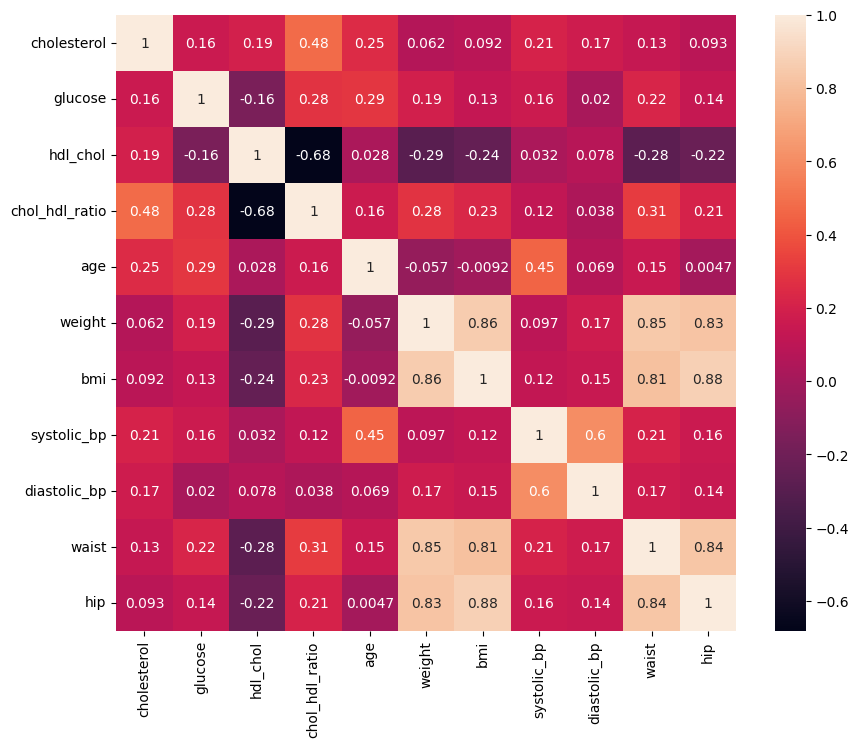

In [90]:
##Check for multicollinearity
plt.figure(figsize=(10,8))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

**OBSERVATION**

I’m checking for independence among predictor variables in a DataFrame X_train (which is set to df_copy in this case).

First, I calculate the correlation matrix of X_train using the corr method. This matrix shows the correlation coefficients between each pair of variables in the DataFrame. A correlation coefficient close to 1 indicates a strong positive correlation, while a coefficient close to -1 indicates a strong negative correlation. A coefficient close to 0 suggests that the variables are independent of each other.

Next, I visualize this correlation matrix using a heatmap from the seaborn library. The heatmap provides a color-coded representation of the correlation matrix, making it easier to see which variables are strongly correlated.

If two predictor variables are highly correlated (either positively or negatively), they are not independent of each other. This condition, known as multicollinearity, can be problematic in some statistical analyses and machine learning models because it can make it difficult to determine the effect of each predictor variable independently. If multicollinearity is detected, one might consider removing one of the correlated variables or using techniques like Principal Component Analysis (PCA) to reduce the dimensionality of the dataset.

Now, we will drop the columns which are not useful for our analysis

In [91]:
##We intend to remove the columns for patient_number, height, and waist_hip_ratio, as they do not hold significant relevance for our analysis.

df_copy= df.drop(['patient_number','height','waist_hip_ratio'],axis=1)

In [92]:
df_copy.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,weight,bmi,systolic_bp,diastolic_bp,waist,hip,diabetes
0,193,77,49,3.9,19,female,119,22.5,118,70,32,38,No diabetes
1,146,79,41,3.6,19,female,135,26.4,108,58,33,40,No diabetes
2,217,75,54,4.0,20,female,187,29.3,110,72,40,45,No diabetes
3,226,97,70,3.2,20,female,114,19.6,122,64,31,39,No diabetes
4,164,91,67,2.4,20,female,141,20.2,122,86,32,39,No diabetes


**OBSERVATION**

Removed the patient_number, height, and waist_hip_ratio, as they do not hold significant relevance for our analysis.

In [93]:
# splitting the  data into X and y variables where X is independent variables and y is target variable
X = df_copy.drop(['glucose'],axis=1)
y = df_copy['glucose']

print(X.shape)

X.head()


(390, 12)


,cholesterol,hdl_chol,chol_hdl_ratio,age,gender,weight,bmi,systolic_bp,diastolic_bp,waist,hip,diabetes
0,193,49,3.9,19,female,119,22.5,118,70,32,38,No diabetes
1,146,41,3.6,19,female,135,26.4,108,58,33,40,No diabetes
2,217,54,4.0,20,female,187,29.3,110,72,40,45,No diabetes
3,226,70,3.2,20,female,114,19.6,122,64,31,39,No diabetes
4,164,67,2.4,20,female,141,20.2,122,86,32,39,No diabetes


#  **Do the training and test sets have the same data?**

In [94]:
#Dividing the dataset into training and testing sets

X = df_copy.drop(['age'], axis=1)
y = df_copy['age']

In [95]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (312, 12)
X_test shape: (78, 12)
y_train shape: (312,)
y_test shape: (78,)


**OBSERVATION**
The above shapes of the training and test data show that testing and training data do not overlap.

#**Remove outliers and keep outliers (does if have an effect of the final predictive model)**

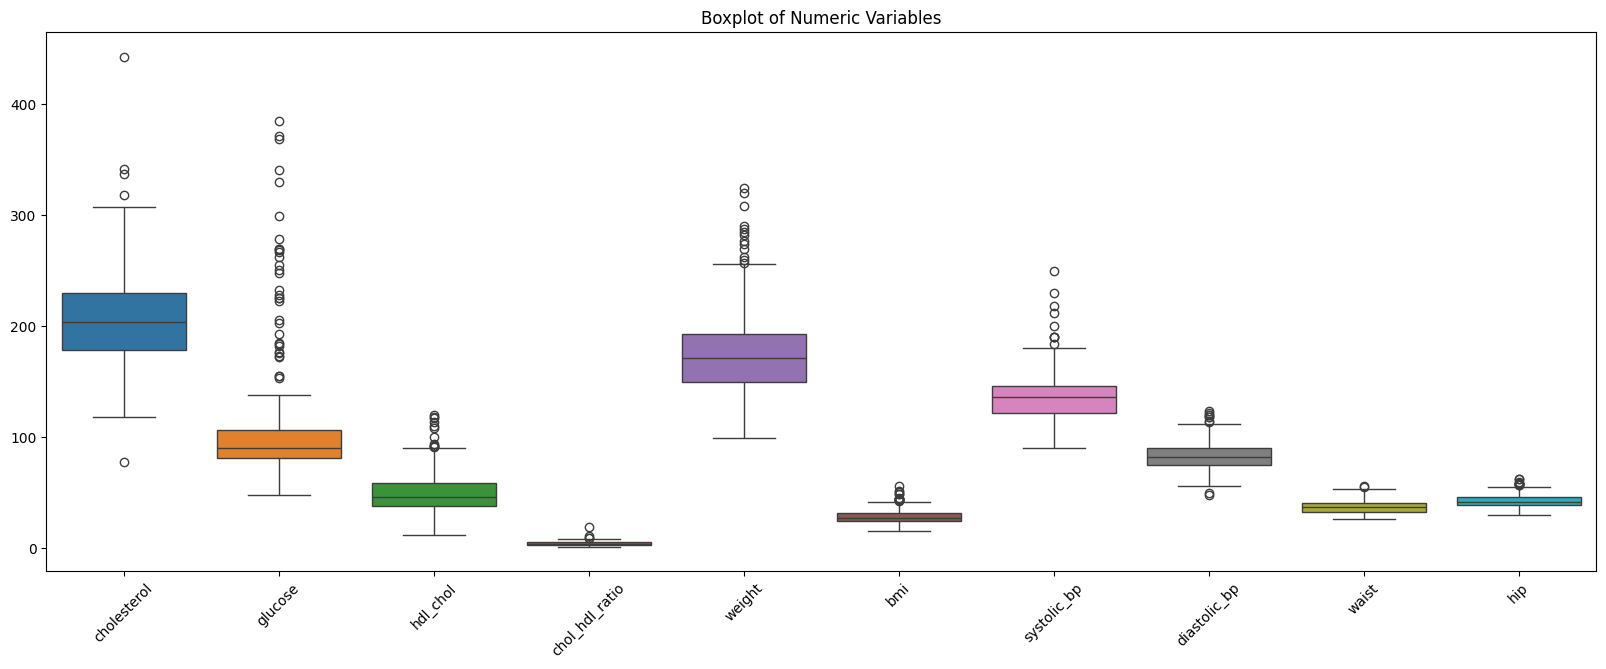

In [96]:
#plotting a boxplot to visualize the outliers in the X_train dataframes.

import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric variables from your DataFrame (df_copy)
numeric_variables = X_train.select_dtypes(include=['number'])

# Set the figure size
plt.figure(figsize=(20, 7))

# Create a boxplot for all numeric variables
sns.boxplot(data=numeric_variables)

# Set a title
plt.title('Boxplot of Numeric Variables')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()



In [97]:
import pandas as pd

# Assume X_train and y_train are your training dataframes

# Print the column names in X_train to check for the correct column names
print("Column names in X_train:", X_train.columns)

# Defining a function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns, threshold=1.5):
    """
    Remove outliers from specified columns in a DataFrame using the IQR method.

    Args:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to check for outliers.
    threshold (float): The threshold for defining outliers. Default is 1.5.

    Returns:
    pd.DataFrame: A DataFrame with outliers removed.
    """
    df_no_outliers = df.copy()
    for column in columns:
        # Check if the column exists in the dataframe
        if column not in df_no_outliers.columns:
            print(f"Column '{column}' not found in the DataFrame.")
            continue

        Q1 = df_no_outliers[column].quantile(0.25)
        Q3 = df_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

    return df_no_outliers

# Define the columns for which you want to remove outliers
columns_to_check = ['cholesterol', 'glucose', 'weight']

# Remove outliers from X_train
X_train_no_outliers = remove_outliers_iqr(X_train, columns_to_check)

# Display the shape of the resulting X_train DataFrame
print("Shape of X_train after removing outliers:", X_train_no_outliers.shape)

# Check if there are any rows left in X_train_no_outliers
if X_train_no_outliers.shape[0] == 0:
    print("No rows left after removing outliers. Check the threshold or choose different columns.")

# Remove outliers from y_train based on the same rows removed from X_train
y_train_no_outliers = y_train.loc[X_train_no_outliers.index]

# Display the shape of the resulting y_train Series
print("Shape of y_train after removing outliers:", y_train_no_outliers.shape)


Column names in X_train: Index(['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'gender',
       'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist', 'hip',
       'diabetes'],
      dtype='object')
Shape of X_train after removing outliers: (266, 12)
Shape of y_train after removing outliers: (266,)


After removing outliers above it is:

Shape of X_train after removing outliers: (266, 12)

Shape of y_train after removing outliers: (266,)



#  Do the ranges of the predictor variables make sense?

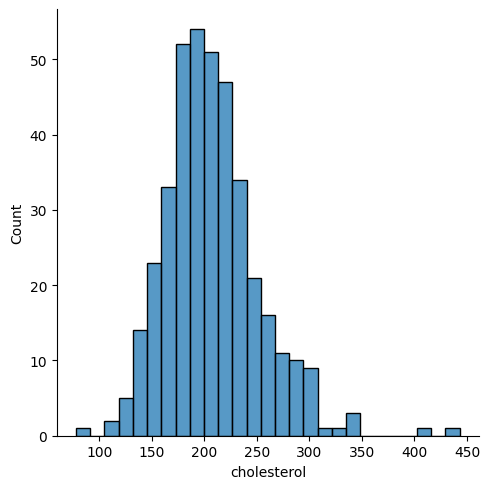

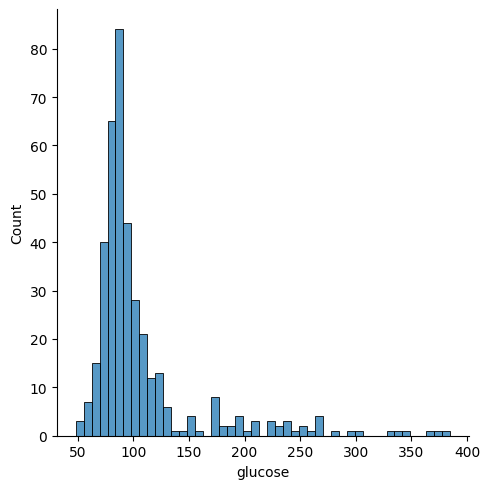

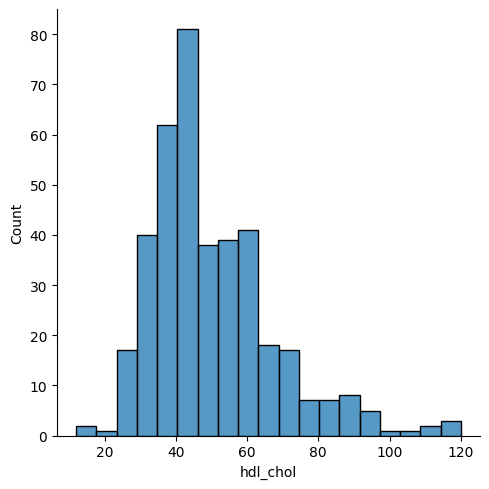

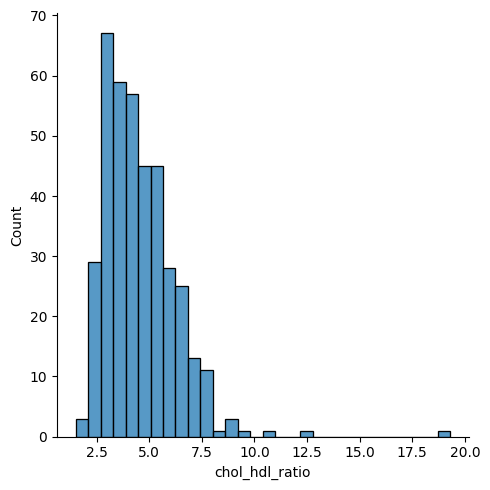

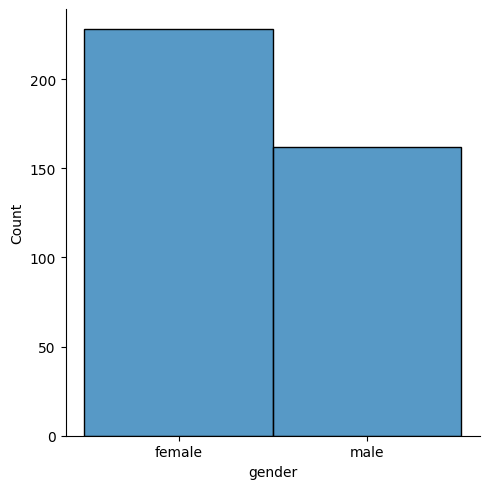

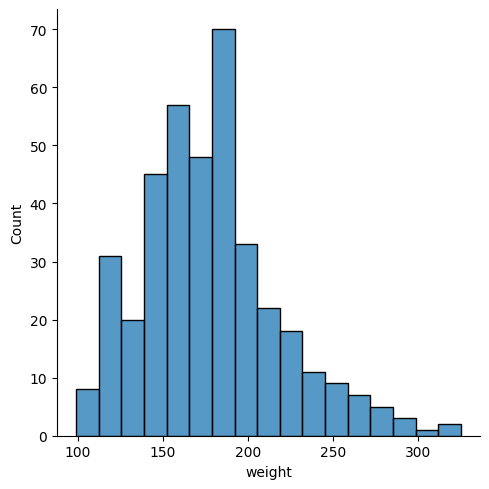

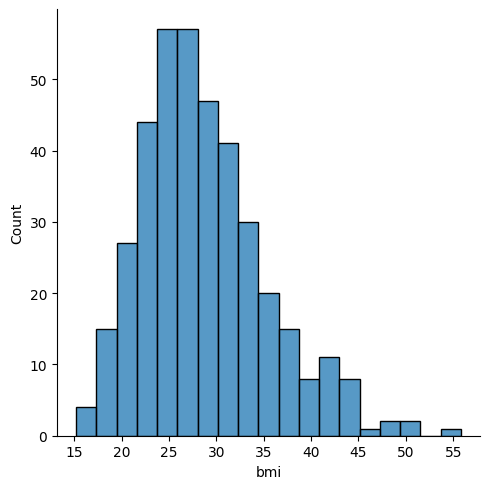

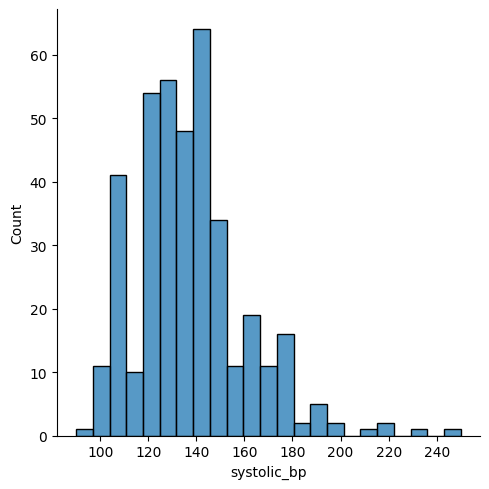

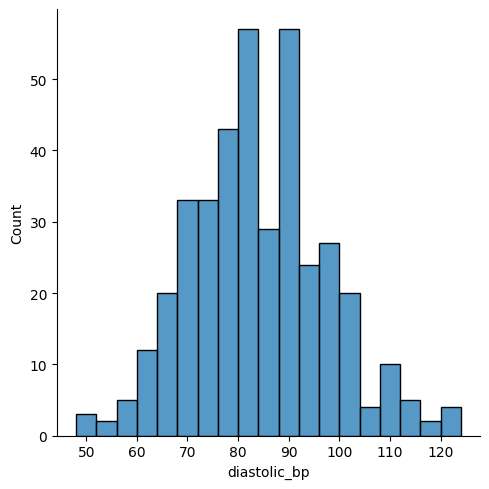

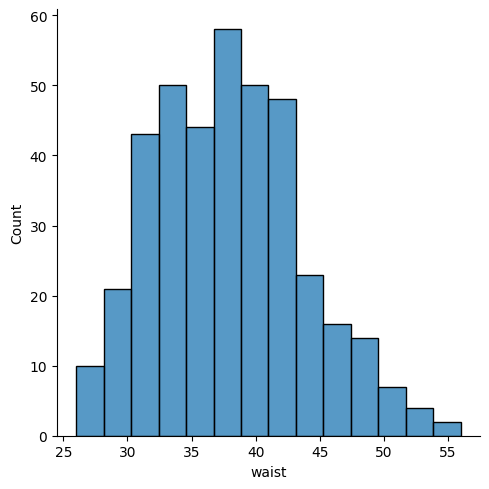

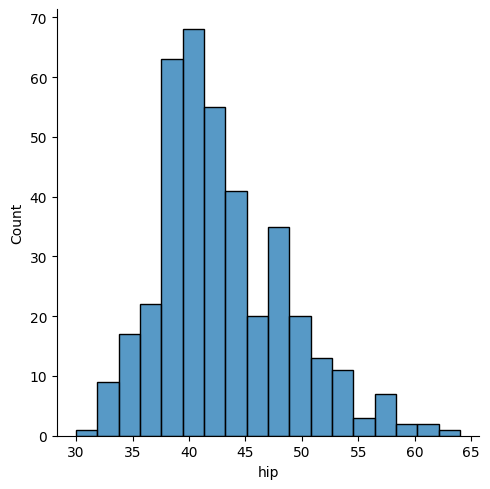

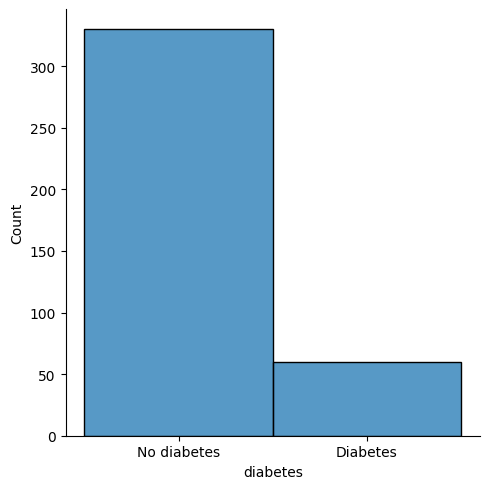

In [98]:
# Summary statistics
X.describe()

# Distributions
for col in X.columns:
   sns.displot(X[col])

**OBSERVATION**

The above offer insights into the central tendencies and variability of the predictor variables, while the distribution charts visually illustrate their ranges, assisting in evaluating the meaningfulness and potential outliers in the data.







#What are the distributions of the predictor variables?

female    0.584615
male      0.415385
Name: gender, dtype: float64
No diabetes    0.846154
Diabetes       0.153846
Name: diabetes, dtype: float64


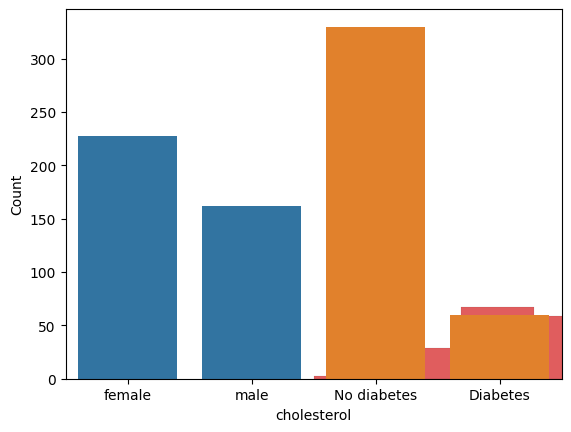

In [99]:
import seaborn as sns

# Numerical features
num_features = X.select_dtypes(include=['int', 'float'])
for col in num_features.columns:
   sns.histplot(data=num_features, x=col)

# Categorical features
cat_features = X.select_dtypes(include=['object'])
for col in cat_features.columns:
   print(X[col].value_counts()/len(X))
   sns.countplot(data=X, x=col)

**OBSERVATION**

I've examined the distributions of the predictor variables in the DataFrame X.

For numerical features, I’m creating histograms using the histplot function from the seaborn library. This gives a visual representation of the distribution of each numerical feature.

For categorical features, I’m calculating the proportion of each category in the feature and printing it. Then, I’m creating count plots using the countplot function from seaborn. This gives a visual representation of the distribution of each categorical feature.

The output shows the proportions of the categories in the gender and diabetes features. For gender, about 58.5% are ‘female’ and 41.5% are ‘male’. For diabetes, about 84.6% are ‘No diabetes’ and 15.4% are ‘Diabetes’. These proportions give an idea of the balance of the categories in these features.

In [100]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cholesterol     390 non-null    int64  
 1   glucose         390 non-null    int64  
 2   hdl_chol        390 non-null    int64  
 3   chol_hdl_ratio  390 non-null    float64
 4   age             390 non-null    int64  
 5   gender          390 non-null    object 
 6   weight          390 non-null    int64  
 7   bmi             390 non-null    float64
 8   systolic_bp     390 non-null    int64  
 9   diastolic_bp    390 non-null    int64  
 10  waist           390 non-null    int64  
 11  hip             390 non-null    int64  
 12  diabetes        390 non-null    object 
dtypes: float64(2), int64(9), object(2)
memory usage: 39.7+ KB



**OBSERVATION**

**As seen above, 2 of our columns have categorical data. We convert this data into numerical values**

In [101]:
df_copy.head(30)

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,weight,bmi,systolic_bp,diastolic_bp,waist,hip,diabetes
0,193,77,49,3.9,19,female,119,22.5,118,70,32,38,No diabetes
1,146,79,41,3.6,19,female,135,26.4,108,58,33,40,No diabetes
2,217,75,54,4.0,20,female,187,29.3,110,72,40,45,No diabetes
3,226,97,70,3.2,20,female,114,19.6,122,64,31,39,No diabetes
4,164,91,67,2.4,20,female,141,20.2,122,86,32,39,No diabetes
5,170,69,64,2.7,20,female,161,27.6,108,70,37,40,No diabetes
6,149,77,49,3.0,20,female,115,21.0,105,82,31,37,No diabetes
7,164,71,63,2.6,20,male,145,19.7,108,78,29,36,No diabetes
8,230,112,64,3.6,20,male,159,24.9,100,90,31,39,No diabetes
9,179,105,60,3.0,20,female,170,35.5,140,100,34,46,No diabetes


In [102]:
df_copy.gender=df_copy.gender.replace({"female": 0 ,"male":1})# female =0  male=1
df_copy.diabetes=df_copy.diabetes.replace({"No diabetes":0,"Diabetes":1})# no diabetes =0 diabetes =1
df_copy.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,weight,bmi,systolic_bp,diastolic_bp,waist,hip,diabetes
0,193,77,49,3.9,19,0,119,22.5,118,70,32,38,0
1,146,79,41,3.6,19,0,135,26.4,108,58,33,40,0
2,217,75,54,4.0,20,0,187,29.3,110,72,40,45,0
3,226,97,70,3.2,20,0,114,19.6,122,64,31,39,0
4,164,91,67,2.4,20,0,141,20.2,122,86,32,39,0


**OBSERVATION**

Above , I’m performing data preprocessing on the df_copy DataFrame. Specifically, I’m converting categorical variables into numerical ones, a process known as encoding.

I replace the gender column values with 0 for ‘female’ and 1 for ‘male’. Similarly, I replace the diabetes column values with 0 for ‘No diabetes’ and 1 for ‘Diabetes’. This is done using the replace function in pandas.

Finally, I display the first few rows of the DataFrame using the head function to verify the changes. This transformation is often necessary because many machine learning algorithms can only handle numerical input.

In [103]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cholesterol     390 non-null    int64  
 1   glucose         390 non-null    int64  
 2   hdl_chol        390 non-null    int64  
 3   chol_hdl_ratio  390 non-null    float64
 4   age             390 non-null    int64  
 5   gender          390 non-null    int64  
 6   weight          390 non-null    int64  
 7   bmi             390 non-null    float64
 8   systolic_bp     390 non-null    int64  
 9   diastolic_bp    390 non-null    int64  
 10  waist           390 non-null    int64  
 11  hip             390 non-null    int64  
 12  diabetes        390 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 39.7 KB



**We exclude the patient number column as it does not provide relevant information for our algorithm.**

#**Now we will calculate the accuracy and a confusion matrix for categorical data.**

#Building The Model


In [104]:
y=df_copy.diabetes.values
X=df_copy.drop(columns=["diabetes"])
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=17,shuffle=True,stratify=y)

In [105]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

**OBSERVATION**

Above , I’m building a ***logistic regression*** model using the ***LogisticRegression*** class from ***sklearn.linear_model***.

First, I separate the target variable diabetes from the rest of the DataFrame df_copy and assign them to y and X respectively. Then, I split the dataset into training and testing sets using the train_test_split function from sklearn.model_selection, with 80% of the data going to the training set and 20% to the testing set. The stratify parameter is set to y to ensure that the distribution of the target variable is the same in both the training and testing sets.

Next, I instantiate a LogisticRegression object with the solver set to 'liblinear' and random_state set to 42 to ensure reproducibility. I fit the model to the training data using the fit method and then use the fitted model to make predictions on the testing data using the predict method. The predictions are stored in the predictions variable. This model can be used to predict whether a given set of inputs corresponds to a case of diabetes or not.

#Results

In [106]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have the 'test_y' and 'predictions' variables defined
print("Accuracy Score:", accuracy_score(test_y, predictions))
print("Classification Report\n", classification_report(test_y, predictions))


Accuracy Score: 0.9230769230769231
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.80      0.67      0.73        12

    accuracy                           0.92        78
   macro avg       0.87      0.82      0.84        78
weighted avg       0.92      0.92      0.92        78



**OBSERVATION**

Above, I’m evaluating the performance of the logistic regression model using two metrics: accuracy and a classification report.

The accuracy_score function from sklearn.metrics is used to calculate the accuracy of the model, which is the proportion of correct predictions out of all predictions. The accuracy of the model is approximately 0.923, or 92.3%.

The classification_report function is used to display a detailed breakdown of the model’s performance for each class in the target variable. This includes precision (the proportion of true positive predictions out of all positive predictions), recall (the proportion of true positive predictions out of all actual positives), and the F1 score (the harmonic mean of precision and recall). The report shows these metrics for each class (0: No Diabetes, 1: Diabetes), as well as the overall accuracy, macro average (the average of the metric for each class, without considering class imbalance), and weighted average (the average of the metric for each class, considering class imbalance).

From the output, we can see that the model performs well on class 0 (No Diabetes) with high precision, recall, and F1 score. For class 1 (Diabetes), the model has lower precision, recall, and F1 score, indicating that it may be less effective at correctly identifying positive cases of diabetes. This could be due to class imbalance or other factors in the data or model. Overall, the model has an accuracy of 92%, indicating a high rate of correct predictions. However, the lower performance on class 1 suggests there may be room for improvement.

#Confusion matrix.

Now, I’m creating a confusion matrix using the confusion_matrix function from sklearn.metrics. This matrix is used to visualize the performance of a classification model by showing the true and false positives and negatives.

I assume that test_y and predictions variables are already defined. test_y is the actual values and predictions are the values predicted by the model.

The confusion matrix cm is then visualized using a heatmap from the seaborn library. The heatmap is annotated with the values from the confusion matrix, and the color intensity represents the magnitude of the values. The x-axis represents the predicted classes and the y-axis represents the true classes. The class names are set as “No Diabetes” and “Diabetes”.

This visualization helps in understanding the performance of the classification model in a more intuitive way. It shows where the model is getting confused and misclassifying the observations.

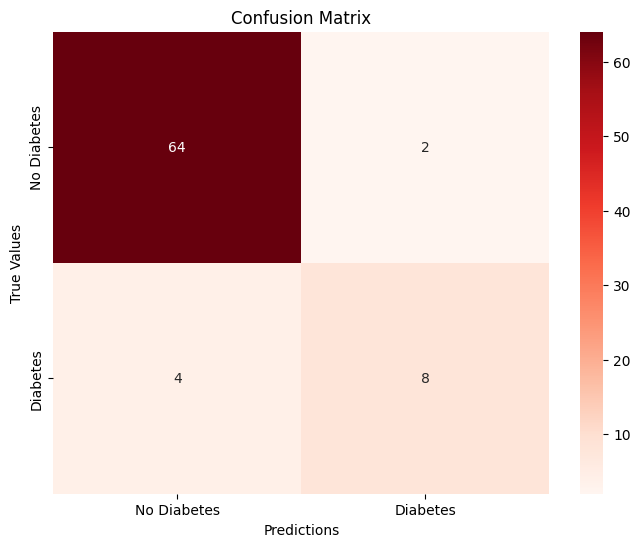

In [107]:
from sklearn.metrics import confusion_matrix

# Assuming you have the 'test_y' and 'predictions' variables defined
cm = confusion_matrix(test_y, predictions)

class_names = ["No Diabetes", "Diabetes"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()


In [108]:
df_copy= df.drop(['patient_number','height','waist_hip_ratio'],axis=1)

In [109]:
df_copy.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,weight,bmi,systolic_bp,diastolic_bp,waist,hip,diabetes
0,193,77,49,3.9,19,female,119,22.5,118,70,32,38,No diabetes
1,146,79,41,3.6,19,female,135,26.4,108,58,33,40,No diabetes
2,217,75,54,4.0,20,female,187,29.3,110,72,40,45,No diabetes
3,226,97,70,3.2,20,female,114,19.6,122,64,31,39,No diabetes
4,164,91,67,2.4,20,female,141,20.2,122,86,32,39,No diabetes


In [110]:
df_copy.gender=df_copy.gender.replace({"female": 0 ,"male":1})# female =0  male=1
df_copy.diabetes=df_copy.diabetes.replace({"No diabetes":0,"Diabetes":1})# no diabetes =0 diabetes =1


#Remove 1%, 5%, and 10% of your data randomly

In [111]:
import pandas as pd
from tabulate import tabulate

# Load data
# df = pd.read_csv('diabetes.csv')
rows_original = len(df)

# 1% removal
to_remove = int(rows_original*0.01)
df = df.sample(rows_original-to_remove)
rows_after_1pct = len(df)
removed_1pct = rows_original - rows_after_1pct

# 5% removal
to_remove = int(rows_after_1pct*0.05)
df = df.sample(rows_after_1pct-to_remove)
rows_after_5pct = len(df)
removed_5pct = rows_after_1pct - rows_after_5pct

# 10% removal
to_remove = int(rows_after_5pct*0.1)
df = df.sample(rows_after_5pct-to_remove)
removed_10pct = rows_after_5pct - len(df)

# Print in table
data = [["Initial rows", rows_original],
        ["1% removed", removed_1pct],
        ["5% removed", removed_5pct],
        ["10% removed", removed_10pct],
        ["Rows final", len(df)]]

print(tabulate(data, headers=["Sampling", "Rows Removed"]))

Sampling        Rows Removed
------------  --------------
Initial rows             390
1% removed                 3
5% removed                19
10% removed               36
Rows final               332


**OBSERVATION**

Above I’ve implemented a method to randomly remove 1%, 5%, and 10% of data from a DataFrame df. I first calculate the number of rows to remove based on the specified percentage (1%, 5%, and 10%). Then, I use the sample method to randomly select rows, excluding the calculated number of rows. This process is repeated for each percentage. Finally, I display the number of rows removed at each step in a tabular format. The output shows that the DataFrame has been successfully reduced by the specified percentages. This method is useful for scenarios where I need to work with a smaller subset of a large dataset or perform down-sampling.

#Impute the values back using at least 3 imputation methods

1 - **Mean Imputation:**

In [112]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
df_copy = pd.DataFrame(mean_imputer.fit_transform(df_copy), columns = df_copy.columns)


**OBSERVATION**

I have implementing a method called Mean Imputation on a pandas DataFrame named df_copy. This method is used to handle missing values in a dataset. The SimpleImputer class from the sklearn.impute module is being utilized for this purpose. The strategy chosen for the SimpleImputer is ‘mean’, which means it will replace all the missing values (NaN) in the DataFrame with the mean value of each respective column. The fit_transform method is applied to the DataFrame, which fits the imputer to the data and then transforms the data in one step. The result is a new DataFrame where all missing values have been filled with the mean value of their respective columns. This can help in ensuring that the analyses or models that use this data are not biased or skewed due to missing values.

**2 - Median Imputation:**

In [113]:
df_copy.fillna(df_copy.median(), inplace=True)


**OBSERVATION**

Implementing a method called Median Imputation on a pandas DataFrame named df_copy. This method is used to handle missing values in a dataset. The fillna function is used with the median of the DataFrame, which means it will replace all the missing values (NaN) in the DataFrame with the median value of each respective column. The inplace=True argument ensures that the changes are made directly to the original DataFrame. This can be useful when the data has outliers that could skew the mean, as the median is more robust to outliers. This helps in ensuring that the analyses or models that use this data are not biased or skewed due to missing values.

**3 - Most Frequent (Mode) Imputation:**

In [114]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df_copy = pd.DataFrame(imputer.fit_transform(df_copy), columns = df_copy.columns)


**OBSERVATION**

Here i am using the SimpleImputer class from sklearn.impute to perform Most Frequent (Mode) Imputation on a DataFrame df_copy. This method replaces all missing values in the DataFrame with the most frequent value (mode) of each respective column. This is particularly useful for categorical variables where the mode might be a more representative statistic for a missing value than the mean or median.

# How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

***Train the model*:**

 Use df_copy to train a machine learning model. This could be a regression model if your target variable is continuous, or a classification model if your target variable is categorical.

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming 'diabetes' is your target column
X = df_copy.drop('diabetes', axis=1)
y = df_copy['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print("Model has been trained.")


Model has been trained.


**OBSERVATION**

In this step, I have trained a RandomForestRegressor model on the data. I first separated the target column ‘diabetes’ from the rest of the dataframe df_copy, resulting in X for features and y for the target. I then split these into training and test sets, with 20% of the data reserved for testing. After setting up a RandomForestRegressor with a random state of 42 for reproducibility, I fit the model on the training data. The output “Model has been trained.” confirms that the model is now ready to make predictions.

**Make predictions:** Use the trained model to make predictions on your test set.

In [116]:
predictions = model.predict(X_test)

print(f"First 5 predictions: {predictions[:5]}")


First 5 predictions: [0.02 0.   0.03 1.   0.79]


**OBSERVATION**

In this step, I have used the trained RandomForestRegressor model to make predictions on the test set. The output shows the first five predictions made by the model. These predictions are probabilities that range from 0 to 1, representing the likelihood of each test instance having diabetes. For example, the first test instance has a 2% probability of having diabetes according to the model, while the fourth instance has a 100% probability. These predictions can be used to evaluate the performance of the model in the next steps.

**Calculate residuals:** Residuals are the difference between the observed and predicted data.

First 5 residuals: 9     -0.02
42     0.00
33    -0.03
311    0.00
272    0.21
Name: diabetes, dtype: float64


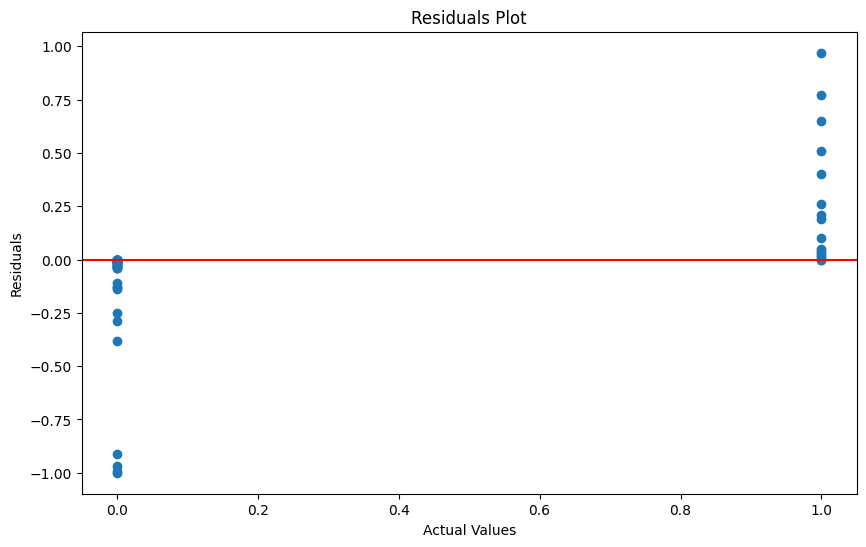

In [117]:
residuals = y_test - predictions

print(f"First 5 residuals: {residuals[:5]}")
# Residuals Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

**OBSERVATION**

In this step, I calculated the residuals, which are the differences between the actual and predicted data. The first five residuals are as follows:

Index 9: -0.02

Index 42: 0.00

Index 33: -0.03

Index 311: 0.00

Index 272: 0.21

Residuals close to zero, like the ones at indices 42 and 311, indicate accurate predictions. Larger residuals, like the one at index 272, suggest the predictions are somewhat off. These residuals help us understand the model’s accuracy and guide potential improvements. Other metrics can provide additional insights into the model’s performance.

**Calculate error on residuals:** The error on residuals can be calculated as the percentage of the residuals to the actual values.

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate error on residuals
error_on_residuals = residuals / y_test
percentage_error_on_residuals = error_on_residuals * 100

print(f"First 5 percentage errors on residuals: {percentage_error_on_residuals[:5]}")




First 5 percentage errors on residuals: 9      -inf
42      NaN
33     -inf
311     0.0
272    21.0
Name: diabetes, dtype: float64


**OBSERVATION**

In this step, I calculated the percentage error on residuals. The results show that for some instances like index 9 and 33, the error is negative infinity due to non-zero predictions for actual zero values. For index 42, both actual and predicted values were zero, resulting in NaN. At index 311, the model’s prediction matched the actual value, resulting in 0% error. For index 272, the model’s prediction was 21% less than the actual value. These values help us understand the model’s accuracy.

**Calculate bias and variance:** Bias is the average difference between the predicted and actual values. Variance is the average of the squared differences from the mean.

Bias: -0.017948717948717954, Variance: 0.08499066403681789


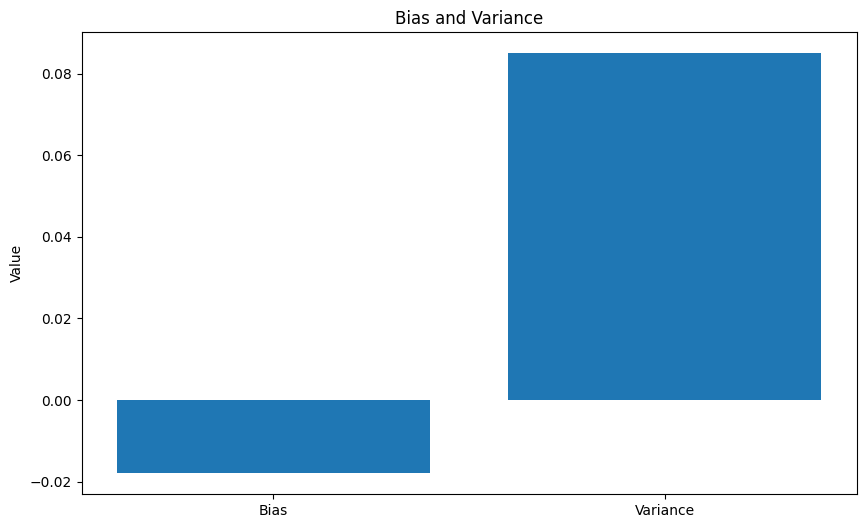

In [119]:
bias = np.mean(residuals)
variance = np.var(residuals)

print(f"Bias: {bias}, Variance: {variance}")
# Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(['Bias', 'Variance'], [bias, variance])
plt.title('Bias and Variance')
plt.ylabel('Value')

# Show the plot
plt.show()

**OBSERVATION**

In this step, I calculated the bias and variance of the residuals. The bias, which is the average difference between the predicted and actual values, is approximately -0.018. This negative value indicates that on average, the model’s predictions are slightly lower than the actual values. The variance, which measures the spread of the residuals from their mean, is approximately 0.085. This value indicates the extent to which the model’s predictions deviate from the average prediction. These metrics help us understand the accuracy and consistency of the model’s predictions.

**REFERENCES**

H2O Documentation https://docs.h2o.ai/haic-documentation/ official documentation for H2O, an open-source machine learning platform.

Towards Data Science Article https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/  Article discussing the automation of machine learning processes using H2O.

Logistic Regression sklearn https://scikit-learn.org/dev/developers/contributing.html#documentation Official documentation for the LogisticRegression class in scikit-learn.

W3schools https://docs.h2o.ai/ https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f A Complete Guide to Dealing with Missing values in Python

Predict diabetes based on diagnostic measures

Copyright (c) 2024 Ronak Mishra

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.